In [67]:
import pydicom as dicom
import matplotlib.pyplot as plt

import numpy as np
import os
import cv2

In [68]:
path = "./PAT034"
img_names = os.listdir(path)

# Read Images

In [69]:
images = np.empty(len(img_names), dtype=object)
for i in range(0, len(img_names)):
    full_path = f"{path}/{img_names[i]}"
    images[i] = dicom.dcmread(full_path).pixel_array

images[0].shape

(512, 512)

# Get Image 3D shapes

In [70]:
x, y = images[0].shape
z = len(img_names)
rotate_angle = 60



# Rotate all images in images set

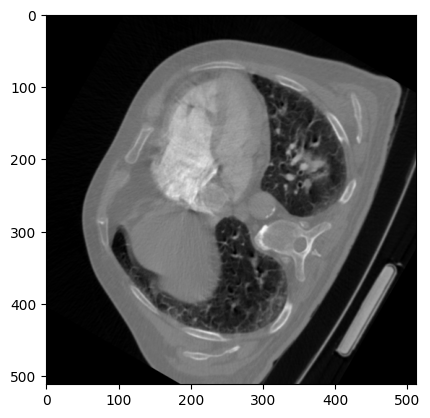

In [71]:
result_imgs = []
rotation_matrix = cv2.getRotationMatrix2D((x/2, y/2), rotate_angle, scale=1)
for i in range(len(images)):
    result_imgs.append(cv2.warpAffine(images[i], rotation_matrix, (x, y)))


result_imgs = np.array(result_imgs)

plt.imshow(result_imgs[50], cmap = "gray")
    

In [72]:
img_3d = np.empty((x, y, z))

for i in range(len(result_imgs)):
    slice = result_imgs[i]
    img_3d[:, :, i] = slice

img_3d

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Rotate 75 degree

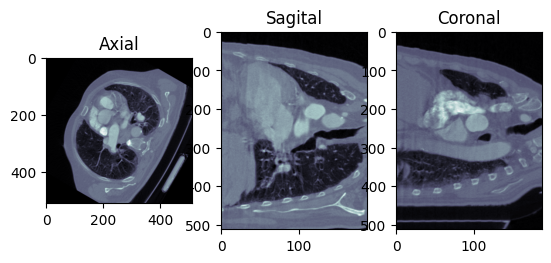

In [73]:
axial = plt.subplot(1, 3, 1)
plt.title("Axial")
plt.imshow(img_3d[:, :, z//2], cmap="bone")
axial.set_aspect(1)


sagital = plt.subplot(1, 3, 2)
plt.title("Sagital")
plt.imshow(img_3d[:, y//2, :], cmap = "bone")
sagital.set_aspect(0.5)

coronal = plt.subplot(1, 3, 3)
plt.title("Coronal")
plt.imshow(img_3d[x//2, :, :], cmap="bone")
coronal.set_aspect(0.5)

plt.savefig(f"rotates/rotate{rotate_angle}.png")